In [1]:
import pandas as pd
df = pd.read_csv("Fake_Real_Data.csv")
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [2]:
df.shape

(9900, 2)

In [3]:
df.label.value_counts()

Fake    5000
Real    4900
Name: label, dtype: int64

In [4]:
df['Label_numbers'] = df['label'].apply(lambda x:1 if x == 'Real' else 0)

In [5]:
df.head()

,Text,label,Label_numbers
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


In [6]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [7]:
doc = nlp('U.S. conservative leader optimistic of common')
doc.vector.shape

(300,)

In [8]:
df['vector'] = df['Text'].apply(lambda text : nlp(text).vector)

In [9]:
df.head()

,Text,label,Label_numbers,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[-0.6759837, 1.4263071, -2.318466, -0.451093, ..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[-1.8355803, 1.3101058, -2.4919677, 1.0268308,..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[-1.9851209, 0.14389805, -2.4221718, 0.9133005..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[-2.7812982, -0.16120885, -1.609772, 1.3624227..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-2.2010763, 0.9961637, -2.4088492, 1.128273, ..."


In [10]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(
    df.vector.values,
    df.Label_numbers,
    test_size = 0.2,
    random_state = 2000, 
)

In [11]:
X_train.shape

(7920,)

In [12]:
X_test.shape

(1980,)

In [13]:
y_train.shape

(7920,)

In [14]:
X_train

array([array([-1.7151260e+00,  5.1727927e-01, -2.0181971e+00,  1.0629067e+00,
               4.0594978e+00,  6.8615776e-01,  7.6955342e-01,  3.5267103e+00,
              -1.0759923e+00, -1.6407974e+00,  5.4513874e+00,  1.8852727e+00,
              -3.6840086e+00,  4.1217294e-01, -3.6526479e-02,  1.9485457e+00,
               1.3722656e+00,  2.0585719e-01, -1.2765341e+00, -1.6035413e+00,
               1.2863590e+00, -5.0326371e-01, -7.5919008e-01, -2.8667572e-01,
              -1.3973086e-02, -1.6994385e+00, -1.6649396e+00, -8.0026191e-01,
              -5.2970004e-01,  6.1578310e-01,  1.2620802e+00, -2.5301969e-01,
              -8.7309825e-01, -1.3408839e+00, -2.1305091e+00, -1.2495627e+00,
               2.8713938e-02,  5.7110590e-01,  1.0835140e+00,  6.8585157e-01,
               4.1152123e-01, -2.7606553e-01,  1.9042642e-01,  8.1455931e-02,
              -1.7154504e+00,  1.3962386e+00,  8.4792352e-01, -2.2995305e+00,
              -4.2273593e-01,  1.7625486e+00, -1.2537820e+00,  1

In [15]:
#Converting 1D array into  2D array

In [16]:
import numpy as np
X_train_2D = np.stack(X_train)
X_test_2D = np.stack(X_test)

In [19]:
from sklearn.metrics import classification_report

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2D)
scaled_test_embed = scaler.transform(X_test_2D)


clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)

MultinomialNB()

In [20]:
y_pred = clf.predict(scaled_test_embed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       956
           1       0.94      0.96      0.95      1024

    accuracy                           0.94      1980
   macro avg       0.95      0.94      0.94      1980
weighted avg       0.95      0.94      0.94      1980



In [25]:
from  sklearn.neighbors import KNeighborsClassifier

# 1. creating a KNN model object
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2D, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2D)

#4. print the classfication report
print(classification_report(y_test, y_pred))

Text(58.222222222222214, 0.5, 'Truth')

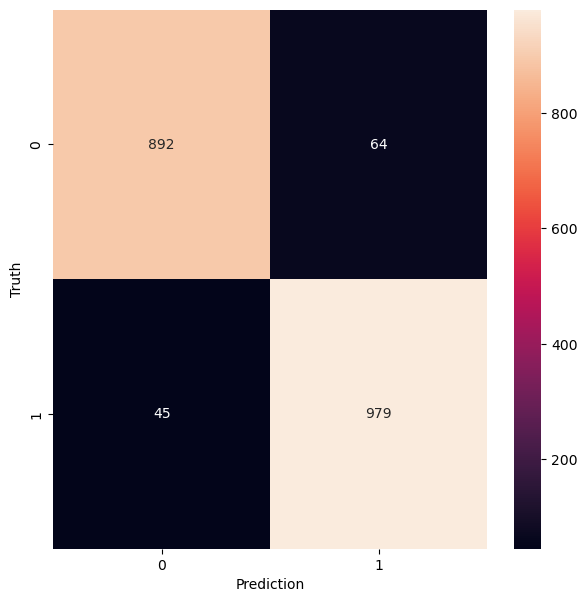

In [28]:
#finally print the confusion matrix for the best model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (7,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')